In [86]:
# Imports
import pandas as pd

In [87]:
path = 'https://raw.githubusercontent.com/Lambda-School-Labs/bridges-to-prosperity-ds-d/main/Data/Combined_dataset.csv'
df_new = pd.read_csv(path)
df_new['Flag for Rejection'].value_counts(dropna = False)

No     1024
NaN     539
Yes     248
Name: Flag for Rejection, dtype: int64

In [88]:
# Build a model to predict whether the bridge will be flaged for rejection or not:

train = df_new[(df_new['Flag for Rejection']== 'Yes') | (df_new['Flag for Rejection']=='No')]
test = df_new[df_new['Flag for Rejection'].isnull()]
train.shape, test.shape

((1272, 39), (539, 39))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


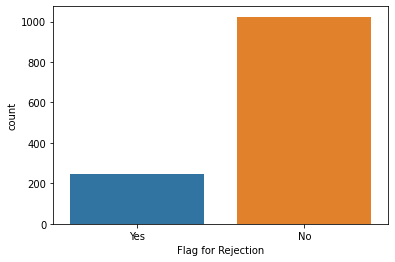

In [89]:
import seaborn as sns

sns.countplot(train['Flag for Rejection']);

In [90]:
# Check the bridge stage:
train['Bridge Opportunity: Stage'].value_counts()

Rejected              1040
Identified             179
Complete                28
Prospecting             16
Under Construction       6
Confirmed                2
Cancelled                1
Name: Bridge Opportunity: Stage, dtype: int64

In [91]:
# Check the bridge stage where the flag for rejection is YESS:
train['Bridge Opportunity: Stage'][train['Flag for Rejection']=='Yes'].value_counts()

Rejected      245
Complete        1
Identified      1
Cancelled       1
Name: Bridge Opportunity: Stage, dtype: int64

In [92]:
# Check the bridge stage where the flag for rejection is NOO:
train['Bridge Opportunity: Stage'][train['Flag for Rejection']=='No'].value_counts()

Rejected              795
Identified            178
Complete               27
Prospecting            16
Under Construction      6
Confirmed               2
Name: Bridge Opportunity: Stage, dtype: int64

In [93]:
# Check the bridge stage where the engineer reviewed:
train['Bridge Opportunity: Stage'][train['Senior Engineering Review Conducted']=='Yes'].value_counts()

Complete       28
Rejected       19
Prospecting    16
Confirmed       2
Cancelled       1
Name: Bridge Opportunity: Stage, dtype: int64

In [94]:
# Check the bridge stage where the flag for rejction is NOO and the Engineer reviewed:
train['Bridge Opportunity: Stage'][(train['Flag for Rejection']=='No') & (train['Senior Engineering Review Conducted']=='Yes')].value_counts()

Complete       27
Rejected       17
Prospecting    16
Confirmed       2
Name: Bridge Opportunity: Stage, dtype: int64

In [95]:
# Check the bridge stage where the flag for rejection is YESS and the engineer reviewed:
train['Bridge Opportunity: Stage'][(train['Flag for Rejection']=='Yes') & (train['Senior Engineering Review Conducted']=='Yes')].value_counts()

Rejected     2
Cancelled    1
Complete     1
Name: Bridge Opportunity: Stage, dtype: int64

In [96]:
# Check the bridge stage where the flag for rejection is NOO and the engineer did not review:
train['Bridge Opportunity: Stage'][(train['Flag for Rejection']=='No') & (train['Senior Engineering Review Conducted'].isnull())].value_counts()

Rejected              778
Identified            178
Under Construction      6
Name: Bridge Opportunity: Stage, dtype: int64

In [97]:
# Check the bridge stage where the flag for rejection is YESS and the engineer did not review:
train['Bridge Opportunity: Stage'][(train['Flag for Rejection']=='Yes') & (train['Senior Engineering Review Conducted'].isnull())].value_counts()

Rejected      243
Identified      1
Name: Bridge Opportunity: Stage, dtype: int64

In [98]:
# Split the dataset to train and test sets:
X_train = train.drop('Flag for Rejection', axis=1)
y_train = train['Flag for Rejection']

X_test = test.drop('Flag for Rejection', axis=1)
y_test = test['Flag for Rejection']

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1272, 38), (1272,), (539, 38), (539,))

In [99]:
df_new.isnull().sum()

Bridge Name                                           0
Bridge Opportunity: Project Code                      0
Bridge Opportunity: Needs Assessment                379
Bridge Opportunity: Level 1 Government              102
Bridge Opportunity: Level 2 Government              118
Bridge Opportunity: Stage                             0
Bridge Opportunity: GPS (Latitude)                   12
Bridge Opportunity: GPS (Longitude)                  12
Bridge Opportunity: Bridge Type                    1289
Bridge Opportunity: Span (m)                       1085
Bridge Opportunity: Individuals Directly Served      20
Bridge Opportunity: Comments                       1417
Current crossing method                             499
Nearest all-weather crossing point                  523
Days per year river is flooded                      502
Flood duration during rainy season                  517
Market access blocked by river                      550
Education access blocked by river               

In [100]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import OrdinalEncoder

# # Ordinal Encoder:
# encoder = OrdinalEncoder()
# encoder.fit(X_train)

# X_train = encoder.transform(X_train)
# X_test = encoder.transform(X_test)

# # Label Encoder:
# label = LabelEncoder()
# label.fit(y_train)
# y_train = label.transform(y_train)

# clf = RandomForestClassifier(n_estimators=100)
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)

In [101]:
# from google.colab import files
# Combined_dataset = df_new.copy()
# Combined_dataset.to_csv( "Combined_dataset.csv",index=False)
# files.download('Combined_dataset.csv')